Step #1 - Import Libraries

Step #2 - Import Dataset

Step #3 - Visualize Dataset

Step #4 - Create Training Dataset

Step #5 - Model Training

Step #6 - Visualize the Results


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [69]:
salary = pd.read_csv("Employee_Salary.csv")

In [70]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [71]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.4 KB


In [72]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


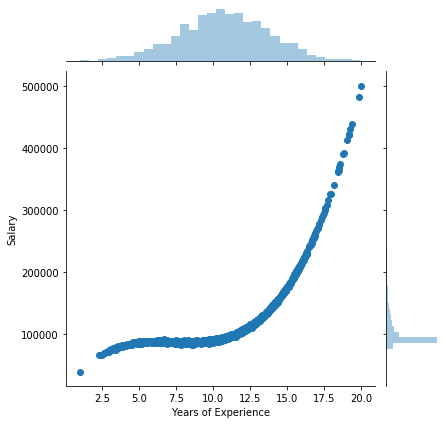

In [90]:
sns.jointplot("Years of Experience","Salary",data=salary)

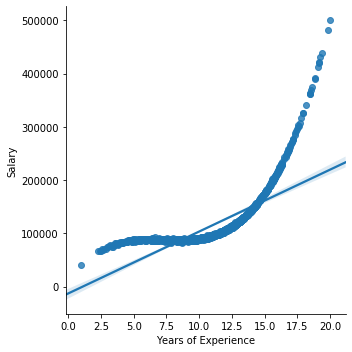

In [92]:
sns.lmplot("Years of Experience","Salary",data=salary)

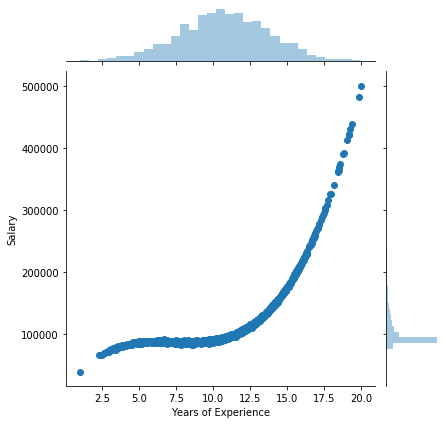

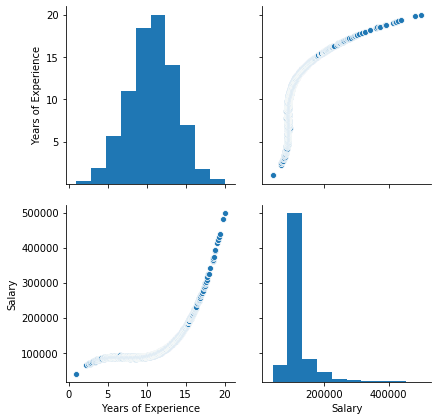

In [93]:
sns.jointplot(x='Years of Experience', y='Salary', data = salary)


sns.pairplot(salary, height=3)


In [94]:
X = salary[['Years of Experience']]

y = salary['Salary']


In [95]:
X_train = X
y_train = y


In [96]:
X_train.shape


y_train.shape


(2000,)

In [97]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression(fit_intercept = True)


regressor.fit(X_train,y_train)


print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)


Linear Model Coefficient (m):  [11640.22916165]
Linear Model Coefficient (b):  -13063.099315186904


Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

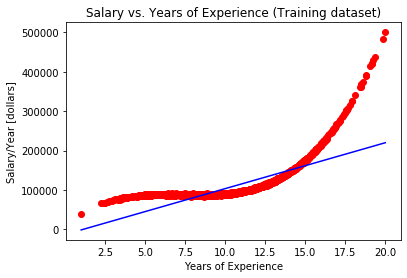

In [98]:

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')


In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)


In [100]:
X_columns = poly_regressor.fit_transform(X_train)

In [101]:
print(X_columns)



regressor = LinearRegression()
regressor.fit(X_columns, y_train)


[[  1.           1.           1.        ]
 [  1.           2.25794198   5.09830199]
 [  1.           2.45087546   6.00679053]
 ...
 [  1.          19.35336879 374.55288352]
 [  1.          19.84251968 393.72558725]
 [  1.          20.         400.        ]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
print('Model Coefficients: ', regressor.coef_)

Model Coefficients:  [     0.         -33106.32895617   2095.78613853]


In [103]:
X_train.shape


y_predict = regressor.predict(poly_regressor.fit_transform(X_train))


y_predict.shape


(2000,)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

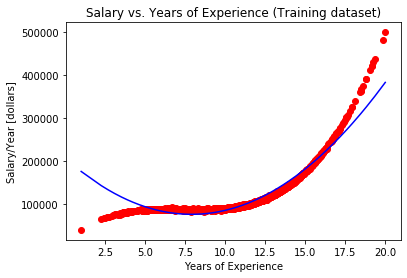

In [104]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')

